Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [60]:
NAME = "Dennis Smits, u1274474 or 632662"
COLLABORATORS = "none"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# Assignment 3

This is the assignment for week 3. This was actually an exam in a previous year. We give the points to give you an idea of how such an exam works. However, we grade assignments only as pass or fail.

# Bargaining model

In a previous class we considered a two period bargaining model. Then we extended this to a three period model.

In this assignment we are going to extend the model to $n$ periods, where $n$ is a variable.


# Import libraries

First, we need to import some libraries:

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [62]:
min_offer=0.0
max_offer=10.0

offers=np.arange(min_offer,max_offer+0.1,0.1)

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the previous class:

In [63]:
# accept_offer function

def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

# make_offer function

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
   
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 
        your_profit = your_outside_option
        other_profit = other_outside_option
    
    return your_offer, your_profit, other_profit

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [64]:
offer = {}

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [65]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
   
    for i in range(n):
        offer[n-i]=make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
   
    return offer[1][1], offer[1][2]


**5)** [0.5 point] Check the outcomes for the case where $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [66]:
# with delta=0.9

print(outcome(1,0.9))

(10.0, 0.0)


In [67]:
# with delta=0.9

print(outcome(2,0.9))

(1.0, 9.0)


In [68]:
# with delta=0.9

print(outcome(3,0.9))

(9.1, 0.9)


**6)** [1 point] Plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game; on the vertical axis the payoff to player 1.

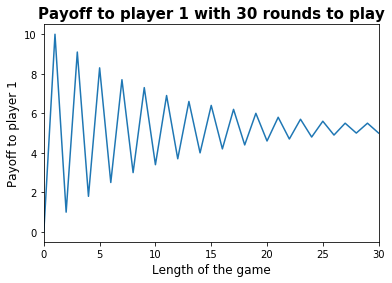

In [69]:
n=30
delta=0.9

range_n=[n for n in range(31)]
payoff_outcome=[outcome(n,0.9)[0] for n in range_n]

plt.title('Payoff to player 1 with 30 rounds to play', fontsize=15, fontweight='heavy')
plt.xlabel('Length of the game', fontsize=12)
plt.ylabel('Payoff to player 1', fontsize=12)
plt.xlim(0,30)
plt.plot(range_n, payoff_outcome) 
plt.show()

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this?

You see that when the length of the game becomes longer, the payoff to player 1 will become smaller. This is, because of the delta factor that assures that the total payoff will be shrinking. This is also the point where an equilibrium is reached.